In [1]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image
import cv2


%matplotlib inline


#이미지 호출에 따른 흑백 또는 컬러로 출력
def imshow(tit,image):
    plt.title(tit)
    if len(image.shape) == 3: #행렬의 크기가 나옴, 컬러영상일경우 3이 나옴
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else: # 흑백영상일 경우 2가 나옴
        plt.imshow(image, cmap='gray')
    plt.show()

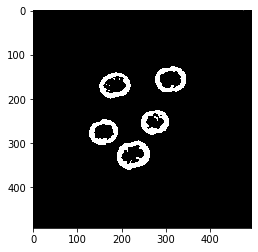

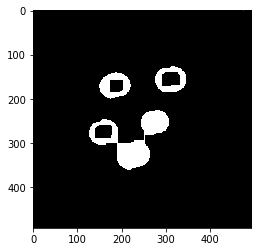

In [5]:
frame = cv2.imread('./data/coin.png') #노이즈로 인해 엣지가 너무 많음
roi = frame.copy()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#노이즈가 있으므로 제거해줘야 함, 블러링 ㄱㄱ
gray_blur = cv2.GaussianBlur(gray, (7,7), 0 )
thresh = cv2.adaptiveThreshold(gray_blur, 255,
                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY_INV, 45, 6) # 배경이 흰색이 되는걸 막기위해 cv2.THRESH_BINARY_INV 사용

imshow('', thresh) # 구멍이 있으므로 안에 메꾸고 팽창해야함, close

kernel = np.ones([3,3], np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel , iterations=10)
imshow('', closing)


전체 도형 shpae = 7


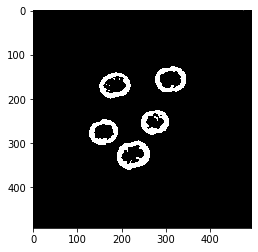

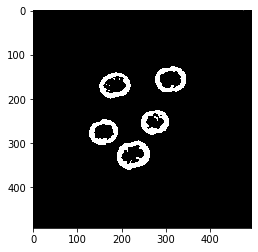

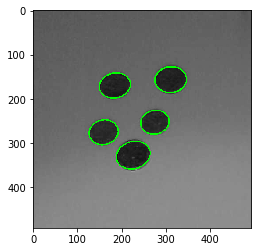

In [12]:
#cont_img = closing.copy()
cont_img = thresh.copy()


#바운더리(꼭지점?) 찾기
contours, _ = cv2.findContours(cont_img,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #findContours 함수는 원본이미지를 변경시키기 때문에 copy를 미리 사용한다.
#print(contours)
print( f"전체 도형 shpae = {len(contours)}")

for con in contours:
    area = cv2.contourArea(con) # 컨투어의 영역(면적)을 계산, 실수값으로 나옴
    if area < 2000 or area > 4000:# 2000보다 작고 4000보다 크면 우리가 원하는게 아님
        continue
    if len(con) < 5: # 점의 개수가 5개보다 작다, 원이 아니다, 패스
        continue
    
    ellipse = cv2.fitEllipse(con) #주어진 점을통해 타원으로 만드는 함수, 만들고나서 값으로 돌려줌
    cv2.ellipse(roi, ellipse, (0, 255,0), 2) #ellipse 는 타원을 그리는 함수임, 그림파일, 길이, 색깔 , 굵기?
    
    #타원으로 매핑하려면 최소한 5개는 있어야 함, 없으면 에러남

    
imshow('',thresh)
imshow('',cont_img )
imshow('',roi )